# Sopio Bregadze 616049
Eine Newton-Cotes-Formel ist ein numerisches Werkzeug um Integrale näherungsweise zu berechnen. Man kann Polynome exakt integrieren, deswegen versuchen wir die zu integrierende Funktion durch ein Polynom zu interpolieren. Für das zu integrierende Polynom vom Grad n werden n+1 Stützpunkte mit dem konstanten Abstand gewählt.

Trapezregel (n=1, 2 Stützpunkte):
$$\int_a^b f(x) dx = \Sigma_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}\Delta x_k =\frac{f(x_{0})+f(x_N)}{2} \Delta x + \Sigma_{k=1}^{N-1} f(x_k)\Delta x$$
N ist die Anzahl der Subintervalle, und  $\Delta x_k=\Delta x$  die Länge des Subintervalls. Alle Subintervalle werden mit gleicher Länge genommen. Hier wird die Kurve mit Trapezen approximiert.

Die Simpson-Regel (n=2, 3 Stützpunkte):
$$\int_a^b f(x) dx = \Sigma_{k=1}^N \frac{\Delta x_k}{3}(f(x_{k-1})+4f(x_{k-1}+h)+f(x_k))$$
Diese Regel verwendet einen zusätzlichen Stützpunkt in der Mitte des Subintervalls.

Boole-Regel (n=4, 5 Stützpunkte):
$$\int_a^b f(x)dx = \Sigma_{k=1}^N \frac{2h}{45}(7f(x_{k-1})+32f(x_{k-1}+h)+12f(x_{k-1}+2h)+32f(x_{k-1}+3h)+7f(x_k))$$

Je größer die Anzahl von Stützpunkten ist, desto kleiner ist der Fehlerterm und desto genauer ist das Ergebnis.

In [1]:
import numpy as np
import time
import scipy.integrate as si
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
from tabulate import tabulate

In [2]:
def f1(x):
    return np.exp(-0.5*(x**2))

In [3]:
def f2(x):
    return 0.2*(x**6)-1.5*(x**5)+6*(x**4)-8*(x**3)

In [4]:
def f3(x):
    return 1/(0.8*(x**2)-3*x+3)

In [5]:
def integrate (f,a,b,n,method):
    aufrufe=0
    if(method=="trapez"):
        x=np.linspace(a,b,n+1)
        delta_x=x[1]-x[0]
        res=-f(x[0])-f(x[n])
        res/=2
        for i in range(n+1):
            res+=f(x[i])
            aufrufe+=1
        res=res*delta_x
    if(method=="simpson"):
        H=(b-a)/n #H=2h
        res=0
        for i in range(n):
            x=np.linspace(a+i*H,a+(i+1)*H,3)
            res+=f(x[0])+4*f(x[1])+f(x[2])
            aufrufe+=3
        res=res*H/6
    if(method=="bode"):
        H=(b-a)/n #H=4h
        res=0
        for i in range(n):
            x=np.linspace(a+i*H,a+(i+1)*H,5)
            res+=7*f(x[0])+32*f(x[1])+12*f(x[2])+32*f(x[3])+7*f(x[4])
            aufrufe+=5
        res=res*H/90
    return res, aufrufe

In [6]:
def integrals (f, a, b, method):
    i=0
    ans=[]
    aufrufe=[]
    teilintervalle=[]
    while (1==1):
        teilintervalle.append(2**i)
        a1=integrate(f, a, b, 2**i, method)
        ans.append(a1[0])
        aufrufe.append(a1[1])
        plt.scatter(teilintervalle[i], ans[i])
        if(i>0):
            if(np.abs(ans[i]-ans[i-1])<np.abs(ans[i-1])*0.001): #########
                break
        i+=1
    plt.plot(teilintervalle, ans)
    plt.xlabel('Anzahl der Teilintervalle')
    plt.ylabel('Ergebniss der Integration')
    if(method=="trapez"): plt.title('Trapezregel')
    if(method=="simpson"): plt.title('Simpson-Regel')
    if(method=="bode"): plt.title('Bode/Boole/Milne-Regel')
    plt.show()
    #print("Die Integrationsfunktionen konvergieren nach", len(ans) ,"Aufrufe.")
    data=[[]]
    data.append([ans[len(ans)-1], aufrufe[len(ans)-1], len(ans)])
    col_names = ["Ergebniss der Integration", "Anzahl der Funktionsaufrufe", "Anzahl der Integralaufrufe"]
    print(tabulate(data[1:], headers=col_names, tablefmt="pretty"))
    
    data=[[]]
    data.append([sum(aufrufe)])
    col_names = ["Gesamte Anzahl der Funktionsaufrufe"]
    print(tabulate(data[1:], headers=col_names, tablefmt="pretty"))
    #print(si.quad(f, a, b)[0])

# $e^{-0.5x^*2}$

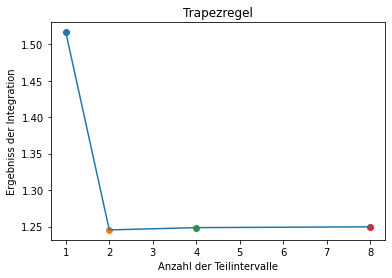

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|    1.2495453663695582     |              9              |             4              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 19                  |
+-------------------------------------+


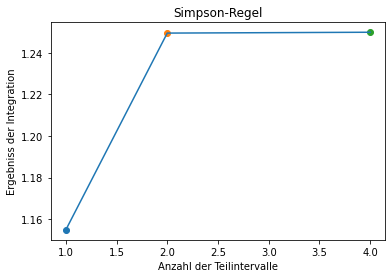

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     1.249908969409068     |             12              |             3              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 21                  |
+-------------------------------------+


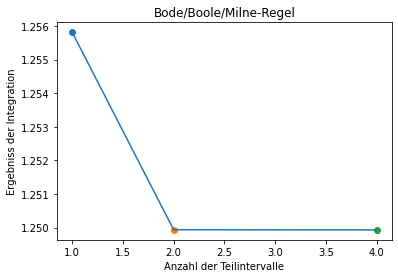

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     1.249930418499891     |             20              |             3              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 35                  |
+-------------------------------------+


In [7]:
method = ["trapez", "simpson", "bode"]
for i in range(3):
    integrals(f1, 0, 3, method[i])

# $0.2x^6-1.5x^5+6x^4-8x^3$

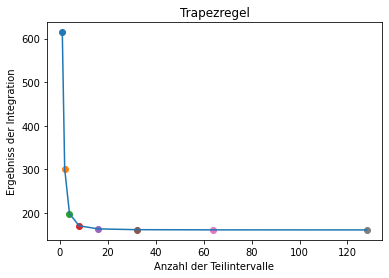

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     160.9517848242074     |             129             |             8              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 263                 |
+-------------------------------------+


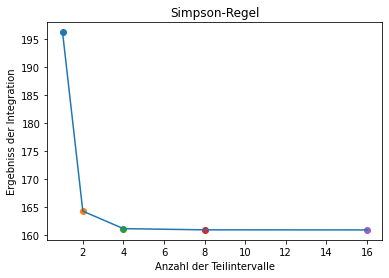

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|    160.91519571940105     |             48              |             5              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 93                  |
+-------------------------------------+


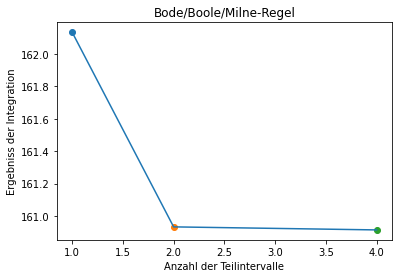

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|    160.91458333333333     |             20              |             3              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 35                  |
+-------------------------------------+


In [8]:
for i in range(3):
    integrals(f2, 0, 4, method[i])

# $\frac{1}{0.8x^2-3x+3}$

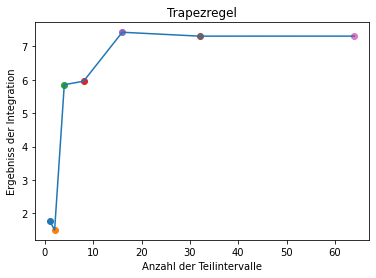

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     7.304788507733858     |             65              |             7              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 134                 |
+-------------------------------------+


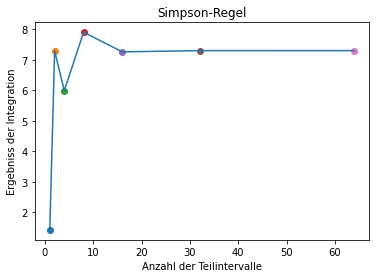

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     7.305475052876901     |             192             |             7              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 381                 |
+-------------------------------------+


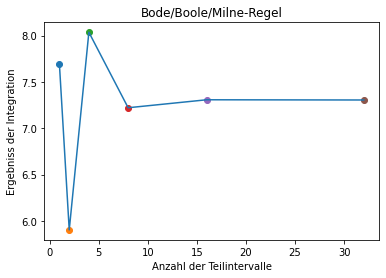

+---------------------------+-----------------------------+----------------------------+
| Ergebniss der Integration | Anzahl der Funktionsaufrufe | Anzahl der Integralaufrufe |
+---------------------------+-----------------------------+----------------------------+
|     7.305496595324687     |             160             |             6              |
+---------------------------+-----------------------------+----------------------------+
+-------------------------------------+
| Gesamte Anzahl der Funktionsaufrufe |
+-------------------------------------+
|                 315                 |
+-------------------------------------+


In [9]:
for i in range(3):
    integrals(f3, 0, 10, method[i])